<a href="https://colab.research.google.com/github/ChilkuriDinesh/Team-Projects/blob/main/covid_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()



Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [2]:
import pandas as pd

df = pd.read_csv("covid_19_clean_complete.csv")
df.head()



,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
# Checking the first few rows
df.head()

# Get dataset info: column names, data types, non-null values
df.info()

# Get summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [4]:
# Checking if any columns have missing values
df.isnull().sum()


,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [5]:
# Filling the missing values with 0
df.fillna(0, inplace=True)


In [6]:
# converting the Date into datetime
df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# checking unique countries
df['Country/Region'].nunique()
df['Country/Region'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

<ipython-input-8-8b3f73c0049c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_confirmed.values, y=top_confirmed.index, palette="Reds_r")


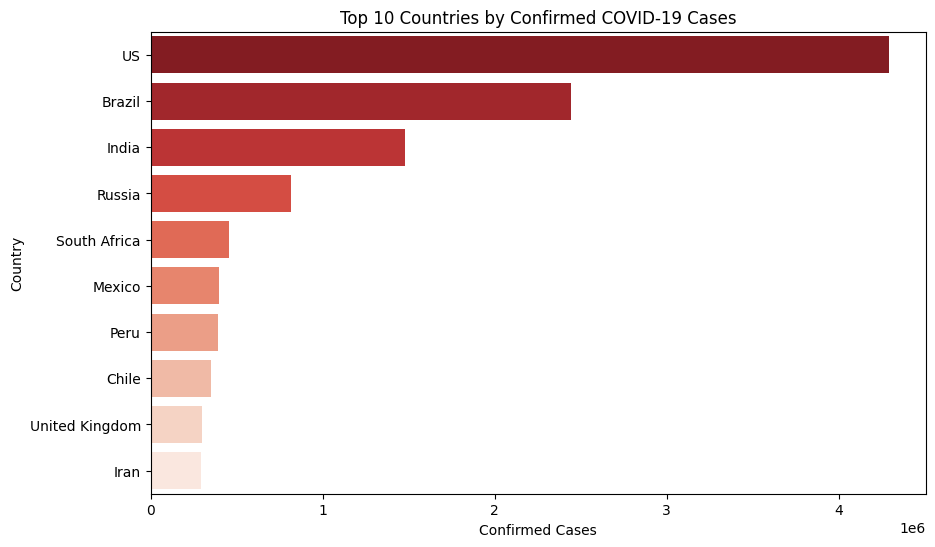

In [8]:
# checking the Top 10 Countries by Total Confirmed cases
import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and get the max confirmed cases
top_confirmed = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_confirmed.values, y=top_confirmed.index, palette="Reds_r")
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.show()


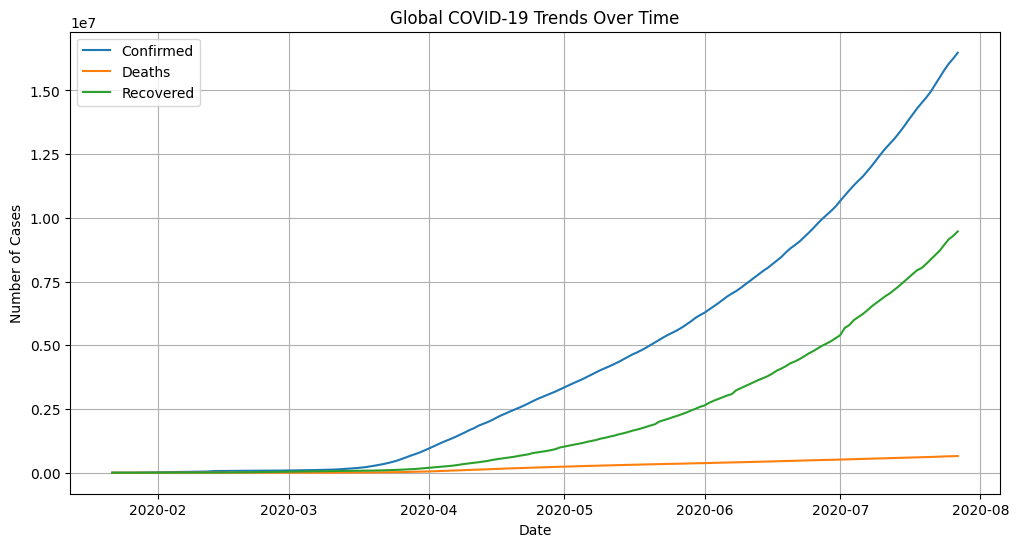

In [9]:
# Global Daily Trend of Confirmed Cases
# Group by Date and sum up values globally
global_daily = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot
plt.figure(figsize=(12,6))
plt.plot(global_daily.index, global_daily['Confirmed'], label='Confirmed')
plt.plot(global_daily.index, global_daily['Deaths'], label='Deaths')
plt.plot(global_daily.index, global_daily['Recovered'], label='Recovered')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

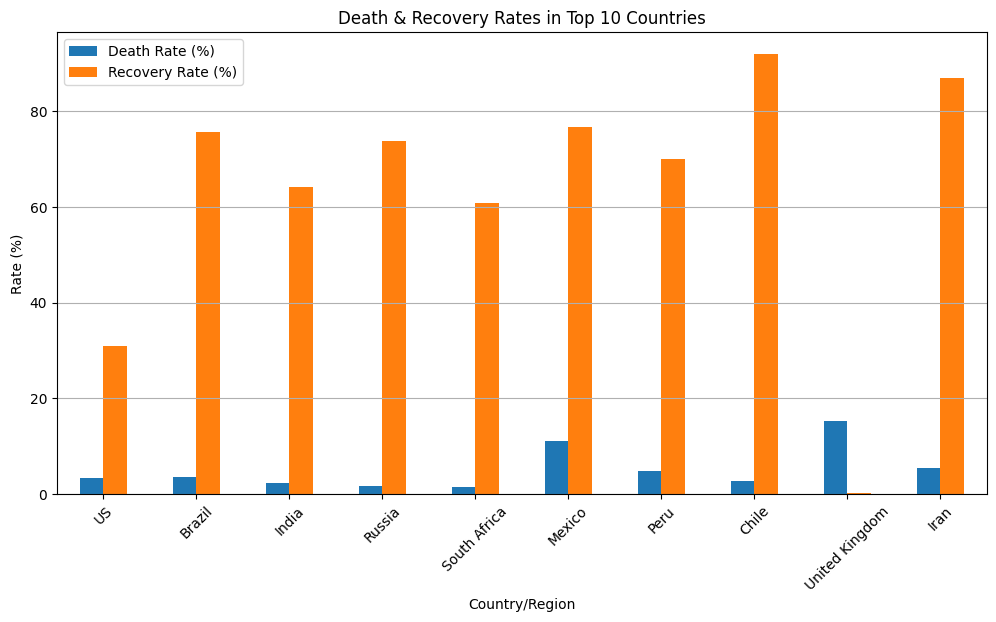

In [10]:
#  Death Rate vs Recovery Rate for Top 10 Countries
# Group data by country and get max values
country_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].max()

# Calculate death and recovery rate
country_data['Death Rate (%)'] = (country_data['Deaths'] / country_data['Confirmed']) * 100
country_data['Recovery Rate (%)'] = (country_data['Recovered'] / country_data['Confirmed']) * 100

# Top 10 countries by confirmed cases
top10 = country_data.sort_values(by='Confirmed', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
top10[['Death Rate (%)', 'Recovery Rate (%)']].plot(kind='bar', figsize=(12,6))
plt.title('Death & Recovery Rates in Top 10 Countries')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
